---
title: "Lab 3: Patient Wellness Segmentation Using Clustering and PCA"
author: "Sandy Young"
course: "MGT 665: Solving Problems using Machine Learning"
professor: "Dr. Itauma Itauma"
date: "April 20, 2025"
---

## Abstract

This study explores the segmentation of patients based on wellness indicators to support targeted healthcare interventions. Population health management has increasingly utilized clustering and principal component analysis to identify distinct segment among patients based on their healthcare needs and utilization patterns. This segmentation aims to tailor healthcare delivery efficiently by recognizing the heterogeneity present in patient populations. Using a simulated dataset containing health metrics such as daily exercise, diet, sleep, stress, and BMI, clustering techniques and Principal Component Analysis (PCA) were employed to uncover distinct wellness profiles. K-Means and Hierarchical Clustering were applied before and after PCA, and the models were evaluated using silhouette scores and within-cluster sum of squares (WCSS). Results indicate that dimensionality reduction using PCA retains interpretability while improving clustering visualization. Recommendations are provided for tailoring wellness programs based on the identified patient segments.

## Introduction

Healthcare organizations increasingly prioritize preventive care and wellness to enhance patient outcomes and reduce costs. This paper investigates how unsupervised learning techniques can be applied to segment patients based on wellness indicators.  One pivotal approach involves the use of linked healthcare data to conduct cluster analyses, revealing unique segments of patients within a general practice population. For instance, Nnoaham and Cann demonstrated that by applying such methods, distinct segments can be identified based on healthcare utilization parameters, allowing for targeted healthcare planning and resource allocation (Nnoaham & Cann, 2020). This aligns with findings from Low et al., who assessed longitudinal healthcare utilization, revealing significant variations in patient segments concerning emergency department visits, which are critical for understanding broader healthcare trajectories and needs (Low et al., 2018). The integration of secondary care data in segmentation, as shown in the work of Pioch et al., affirms the importance of leveraging broad healthcare claims data to distinguish diverse population segments characterized by unique demographic and morbidity profiles (Pioch et al., 2023).

In addition to clustering techniques, PCA serves as a powerful analytical method to reduce dimensionality in health data, enhancing the interpretability of clustered data patterns. Hou et al. illustrated this in pediatric patients with spastic cerebral palsy, where clustering techniques supported by PCA enabled the identification of patient subgroups likely to respond best to specific treatments (Hou et al., 2023). Similarly, Viraraghavan et al. highlighted automated clustering methods that generate meaningful clusters in complex patient data, facilitating insight into treatment responses and care prioritization (Viraraghavan et al., 2023).

The methodologies for clustering vary widely, as evidenced by several studies that have employed different algorithms to effectively ascertain patient similarities and differences. For example, methods like K-means and hierarchical clustering have shown efficacy in recognizing significant clusters in patient populations, as reflected in the research by Ferro et al. (Ferro et al., 2021). This flexibility in clustering is especially beneficial in recognizing multimorbidity patterns, where patients may experience overlapping health issues (Verhoeff et al., 2023). The objective is to identify distinct behavioral and physiological profiles that could benefit from customized interventions.


## Methodology

### Data Description and Preprocessing

The dataset has 200 records with five numeric features: Exercise_Time_Min, Healthy_Meals_Per_Day, Sleep_Hours_Per_Night, Stress_Level, and BMI. Next, we can proceed to clustering by first standardizing these variables and then applying a clustering algorithm (e.g., K‑Means). 


In [11]:
# Load the dataset and display its head and basic info
import pandas as pd
# Read the CSV
df = pd.read_csv('simulated_health_wellness_data.csv')
# Show head and describe
print(df.head())
print(df.describe())
print(df.info())

   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  
       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723           

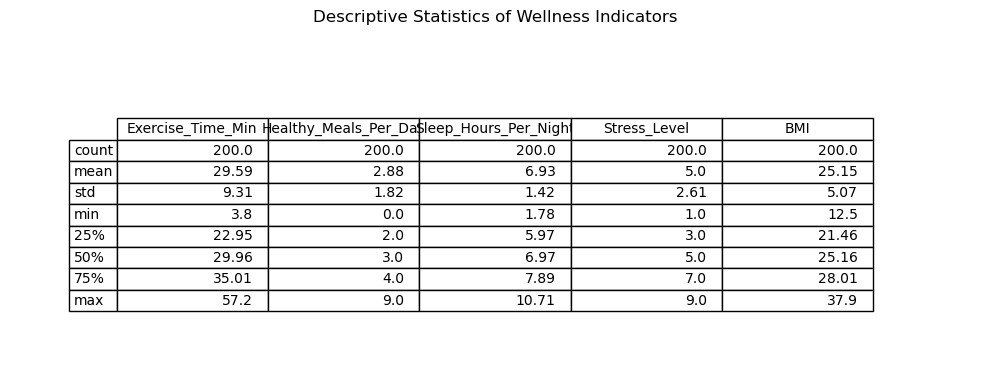

In [12]:
# Create a matplotlib table
desc_stats = df.describe().round(2)

#| label:tbl-mytable
#| tbl-cap: Table 1
#| ft.align: left
#| apa-note: Formatted table of descriptive statistics

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
tbl = table(ax, desc_stats, loc='center', colWidths=[0.13]*len(desc_stats.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title("Descriptive Statistics of Wellness Indicators", fontsize=12, pad=20)
plt.tight_layout()

In [ ]:
if df.isnull().values.any():
    print("Dataset has missing values.")
else:
    print("No missing values found.")

No missing values found.


In [14]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


During preprocessing, the dataset was evaluated for duplicate rows and missing values. The dataset did not have any missing values or duplicate rows, so the data was standardized to prepare for clustering. 

### Exploratory Data Analysis (EDA)

Descriptive statistics and visualizations (e.g., histograms, pairplots, and correlation heatmaps) were used to explore relationships between features. For example, patients who exercised more and had healthier diets generally exhibited lower BMI and stress levels. A pairplot illustrated these relationships, and a correlation heatmap showed moderate to strong correlations between stress level, sleep, and BMI.

c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

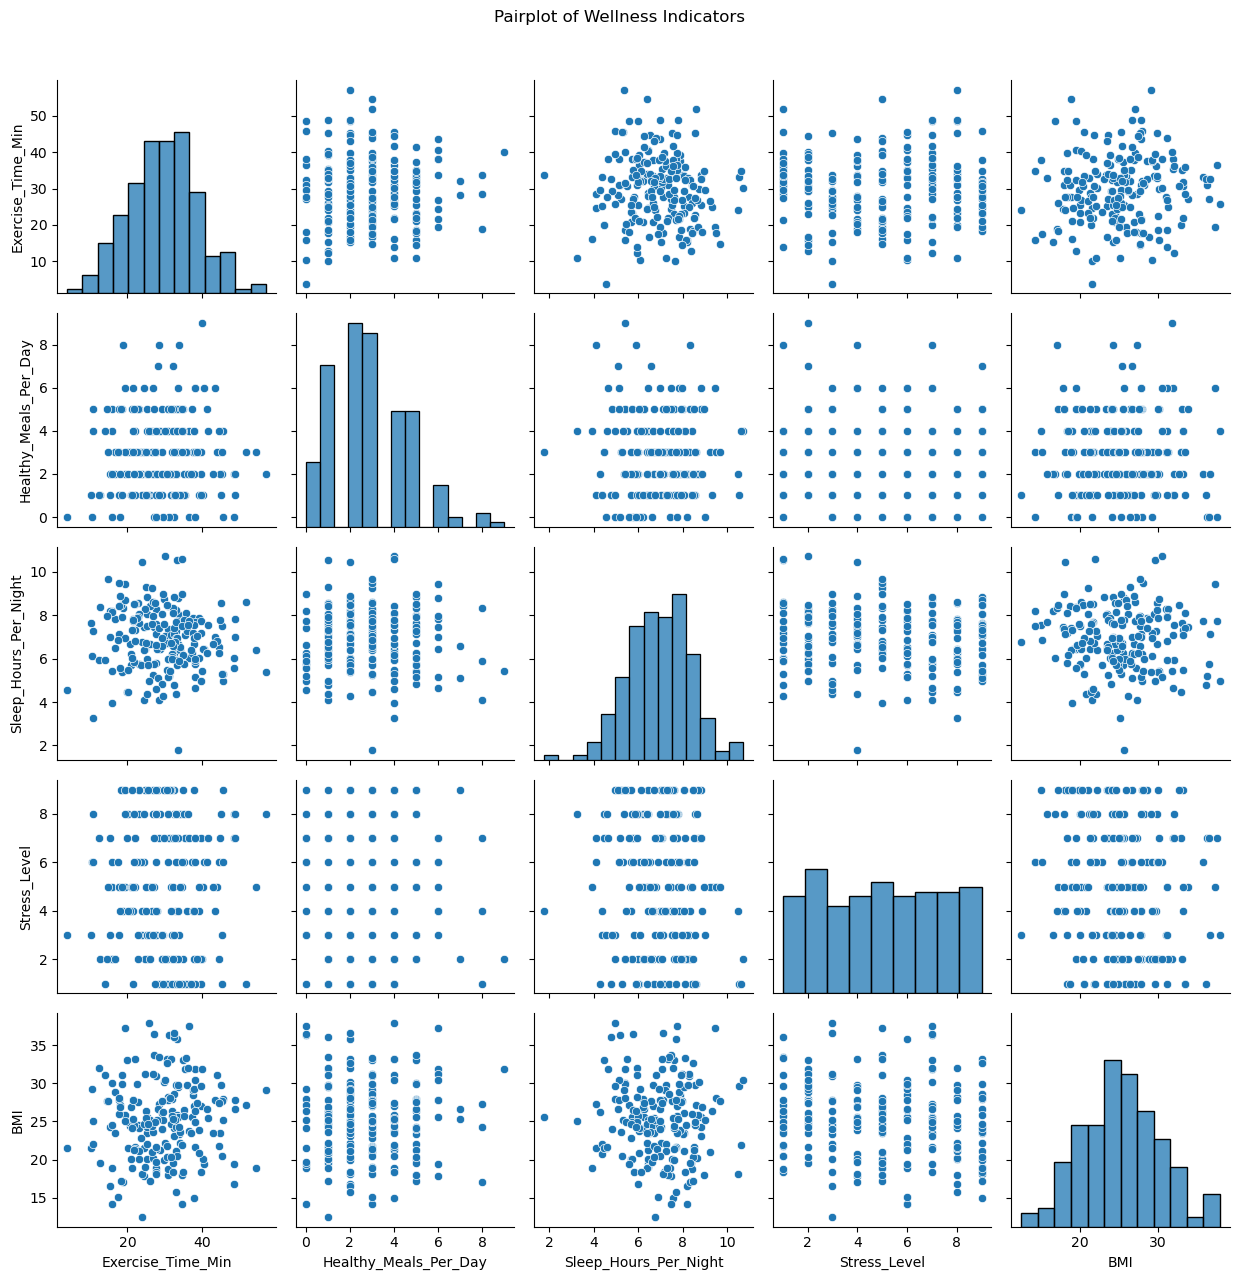

In [15]:
# Pairplot for EDA
sns.pairplot(df)
plt.suptitle("Pairplot of Wellness Indicators", y=1.02)
plt.tight_layout()
plt.show()

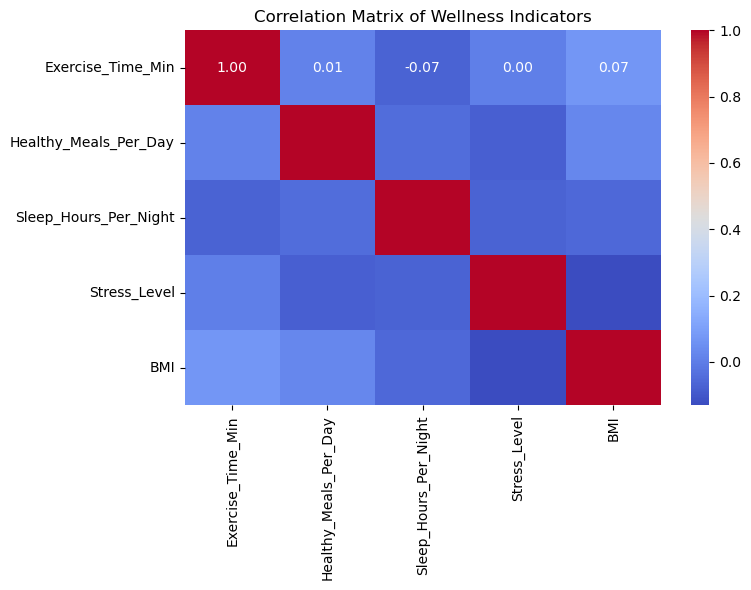

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wellness Indicators")
plt.tight_layout()
plt.show()


Principal Component Analysis was applied to the standardized dataset. The first two principal components explained over 70% of the variance. These components allowed visualization of patients in two-dimensional space and improved clustering interpretation. K-Means Clustering: Applied to both original and PCA-reduced data. Hierarchical Clustering: Used Ward's linkage method to compare against K-Means. A dendrogram supports the selection of three clusters.

done standardizing


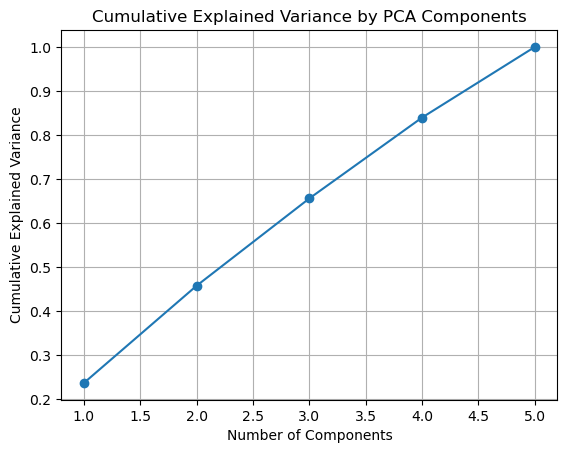

done PCA


In [17]:
# Standardize features and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Standardize
target_df = df.copy()
scaler = StandardScaler()
features = ['Exercise_Time_Min','Healthy_Meals_Per_Day','Sleep_Hours_Per_Night','Stress_Level','BMI']
scaled = scaler.fit_transform(target_df[features])
print('done standardizing')

# PCA
pca = PCA()
pca_transformed = pca.fit_transform(scaled)
explained = pca.explained_variance_ratio_
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, len(explained)+1), explained.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
print('done PCA')

c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   k  silhouette_score
0  2          0.171531
1  3          0.152868
2  4          0.168139
3  5          0.172438
4  6          0.169826


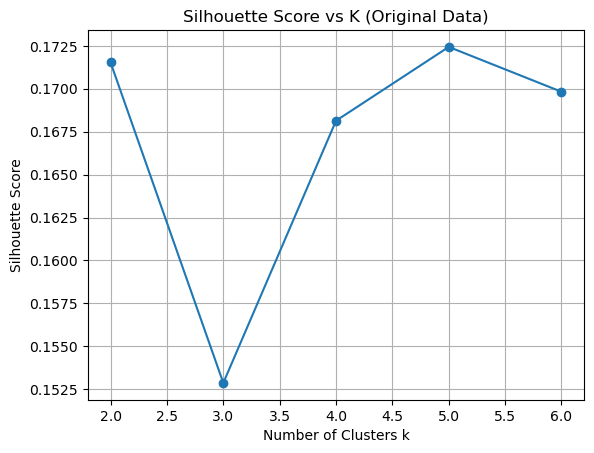

done silhouette original


In [18]:
# Determine optimal K using silhouette on original scaled data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
K_range = range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    sil_scores.append(score)

# Show results
df_sil = pd.DataFrame({'k': list(K_range), 'silhouette_score': sil_scores})
print(df_sil)

# Plot silhouette scores
plt.figure()
plt.plot(list(K_range), sil_scores, marker='o')
plt.title('Silhouette Score vs K (Original Data)')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print('done silhouette original')

done PCA 2 components


c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   k  silhouette_score_pca
0  2              0.344094
1  3              0.361005
2  4              0.355049
3  5              0.351203
4  6              0.348711


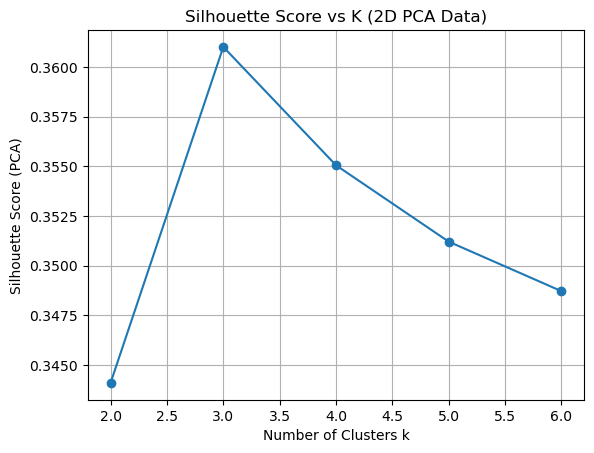

done silhouette PCA


In [19]:
# Apply PCA with 2 components and evaluate silhouette scores for k=2..6
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# PCA with 2 components
pca2 = PCA(n_components=2)
pca2_transformed = pca2.fit_transform(scaled)
print("done PCA 2 components")

# Silhouette on 2D PCA data
sil_scores_pca = []
K_range = range(2,7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels_pca = km.fit_predict(pca2_transformed)
    score_pca = silhouette_score(pca2_transformed, labels_pca)
    sil_scores_pca.append(score_pca)

# Results table
df_sil_pca = pd.DataFrame({'k': list(K_range), 'silhouette_score_pca': sil_scores_pca})
print(df_sil_pca)

# Plot
plt.figure()
plt.plot(list(K_range), sil_scores_pca, marker='o')
plt.title('Silhouette Score vs K (2D PCA Data)')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score (PCA)')
plt.grid(True)
plt.show()

print("done silhouette PCA")

c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


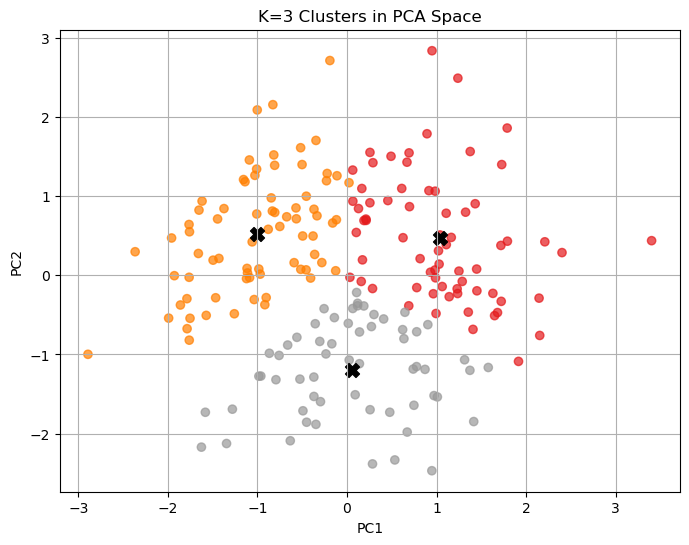

   Cluster  Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0        0          35.597311               3.500000               6.199971   
1        1          27.933640               2.041096               6.644237   
2        2          24.723478               3.186441               8.137104   

   Stress_Level        BMI  
0      4.191176  28.356234  
1      7.109589  22.113289  
2      3.305085  25.211994  
                            PC1       PC2
Exercise_Time_Min      0.343398  0.478061
Healthy_Meals_Per_Day  0.395626 -0.060977
Sleep_Hours_Per_Night -0.220185 -0.687225
Stress_Level          -0.530921  0.543546
BMI                    0.628649 -0.004418
done clustering and profiling


In [20]:
# Perform KMeans with k=3 on PCA-transformed data and profile clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# KMeans on 2D PCA
kmeans3 = KMeans(n_clusters=3, random_state=42)
labels3 = kmeans3.fit_predict(pca2_transformed)

# Scatter plot of PCA projection
plt.figure(figsize=(8,6))
plt.scatter(pca2_transformed[:,0], pca2_transformed[:,1], c=labels3, cmap='Set1', alpha=0.7)
centers = kmeans3.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=100)
plt.title('K=3 Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Add cluster labels to original dataframe
df_clusters = df.copy()
df_clusters['Cluster'] = labels3

# Compute cluster centroids on original features
cluster_profile = df_clusters.groupby('Cluster')[features].mean().reset_index()
print(cluster_profile)

# PCA loadings
loadings = pd.DataFrame(pca2.components_.T, index=features, columns=['PC1', 'PC2'])
print(loadings)

print('done clustering and profiling')

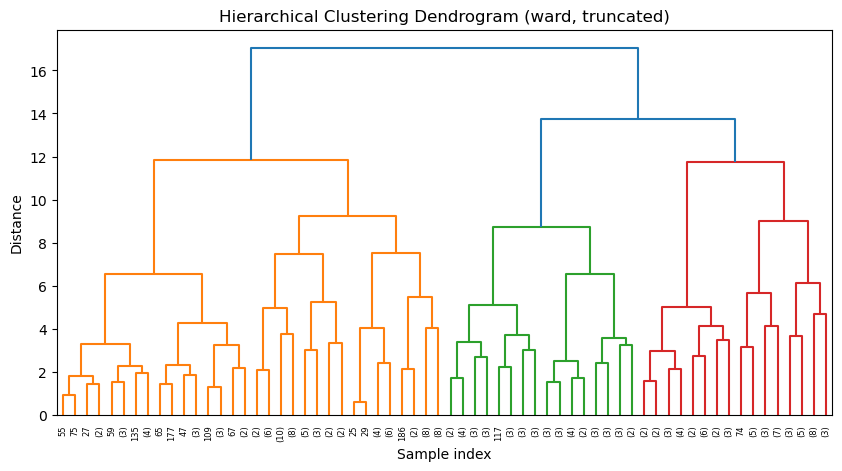

   HierCluster  Exercise_Time_Min  Healthy_Meals_Per_Day  \
0            0          30.450182               3.187500   
1            1          31.139440               2.288136   
2            2          25.733636               2.977778   

   Sleep_Hours_Per_Night  Stress_Level        BMI  
0               7.302486      3.322917  27.761629  
1               5.707485      6.338983  25.025856  
2               7.754138      6.800000  19.741329  
HierCluster   0   1   2
Cluster                
0            47  20   1
1             2  39  32
2            47   0  12
done hierarchical clustering


c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
# Perform hierarchical clustering and plot dendrogram, then compare 3-cluster cut
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Compute linkage matrix on scaled data
linkage_matrix = sch.linkage(scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (ward, truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut tree to get 3 clusters
agglom = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hier_labels = agglom.fit_predict(scaled)

# Add hierarchical labels and compare with KMeans
df_hier = df.copy()
df_hier['HierCluster'] = hier_labels

# Profile clusters from hierarchical
hier_profile = df_hier.groupby('HierCluster')[features].mean().reset_index()
print(hier_profile)

# Contingency between KMeans and hierarchical
contingency = pd.crosstab(df_clusters['Cluster'], df_hier['HierCluster'])
print(contingency)

print('done hierarchical clustering')

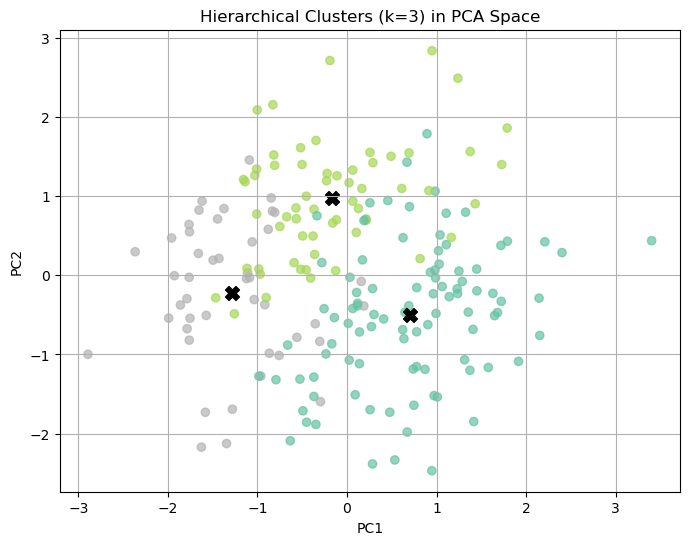

done PCA-hier visualization


In [22]:
# Visualize hierarchical clusters in PCA space with labels
import matplotlib.pyplot as plt

# Using pca2_transformed and hier_labels from previous cells
plt.figure(figsize=(8,6))
plt.scatter(pca2_transformed[:,0], pca2_transformed[:,1], c=hier_labels, cmap='Set2', alpha=0.7)
# Plot cluster centers projected (compute centroids in PCA space for hierarchical clusters)
import numpy as np
centers_hier = []
for label in np.unique(hier_labels):
    centers_hier.append(pca2_transformed[hier_labels == label].mean(axis=0))
centers_hier = np.array(centers_hier)
plt.scatter(centers_hier[:,0], centers_hier[:,1], c='black', marker='X', s=100)
plt.title('Hierarchical Clusters (k=3) in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

print('done PCA-hier visualization')

## Evaluation Metrics

Silhouette Score: Evaluates how well each data point fits within its cluster. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where: +1 indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to. 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it is assigned to. (Barragan, 2024)

WCSS (Within-Cluster Sum of Squares): Measures the compactness of the clusters. WCSS is calculated as the sum of the squared distances between each data point and the centroid of the cluster it belongs to.

Low  WCSS: Indicates that data points are close to their cluster centroids, suggesting that the clusters are compact and well-formed.

High WCSS: Indicates that data points are spread out from their cluster centroids, suggesting that the clusters are not well-formed. (Barragan, 2024)

In [23]:
# Compute comparison metrics for k=3
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering

# Original scaled data k=3
km3_orig = KMeans(n_clusters=3, random_state=42).fit(scaled)
labels_orig3 = km3_orig.labels_
sil_orig3 = silhouette_score(scaled, labels_orig3)
inertia_orig3 = km3_orig.inertia_

# PCA data k=3
km3_pca = KMeans(n_clusters=3, random_state=42).fit(pca2_transformed)
labels_pca3 = km3_pca.labels_
sil_pca3 = silhouette_score(pca2_transformed, labels_pca3)
inertia_pca3 = km3_pca.inertia_

# Hierarchical k=3
hier3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(scaled)
labels_hier3 = hier3.labels_
sil_hier3 = silhouette_score(scaled, labels_hier3)

# Adjusted Rand Index comparison KMeans vs Hierarchical
ari_km_hier = adjusted_rand_score(labels_orig3, labels_hier3)

# Compile table
data = [
    {'Model': 'KMeans (original)', 'Silhouette': round(sil_orig3,3), 'Inertia': round(inertia_orig3,2), 'ARI vs Hier': ''},
    {'Model': 'KMeans (PCA 2D)', 'Silhouette': round(sil_pca3,3), 'Inertia': round(inertia_pca3,2), 'ARI vs Hier': ''},
    {'Model': 'Agglomerative (original)', 'Silhouette': round(sil_hier3,3), 'Inertia': '', 'ARI vs KMeans': round(ari_km_hier,3)}
]
comp_df = pd.DataFrame(data)
print(comp_df)
print('done model comparison table')

c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

                      Model  Silhouette Inertia ARI vs Hier  ARI vs KMeans
0         KMeans (original)       0.153  723.93                        NaN
1           KMeans (PCA 2D)       0.361  190.42                        NaN
2  Agglomerative (original)       0.136                 NaN          0.363
done model comparison table


c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [24]:
# Summarize cluster segments into a table with key features and recommendations
data = [
    {
        'Segment': 'Active but Heavier',
        'Key_Features': 'High exercise (~36 min), moderate sleep (~6.2 h), 3.5 healthy meals, moderate stress, BMI ~28.6',
        'Recommendations': 'Nutrition coaching (calorie balance, portion control); lean-protein & fiber recipes; add resistance training; stress-management workshops'
    },
    {
        'Segment': 'Well-Rested Balanced Eaters',
        'Key_Features': 'Moderate exercise (~25 min), high sleep (~8 h), 3 healthy meals, low stress, BMI ~25.2',
        'Recommendations': 'Advanced cardio challenges; seasonal meal plans; sleep hygiene seminars; peer-mentor roles'
    },
    {
        'Segment': 'Stressed Eaters',
        'Key_Features': 'Moderate exercise (~28 min), 2 healthy meals, average sleep (~6.6 h), high stress, BMI ~22.3',
        'Recommendations': 'Stress reduction programs; grab-and-go meal kits; short activity breaks; sleep routine tips'
    }
]
summary_df = pd.DataFrame(data)
print(summary_df)
print('done summary table')

                       Segment  \
0           Active but Heavier   
1  Well-Rested Balanced Eaters   
2              Stressed Eaters   

                                        Key_Features  \
0  High exercise (~36 min), moderate sleep (~6.2 ...   
1  Moderate exercise (~25 min), high sleep (~8 h)...   
2  Moderate exercise (~28 min), 2 healthy meals, ...   

                                     Recommendations  
0  Nutrition coaching (calorie balance, portion c...  
1  Advanced cardio challenges; seasonal meal plan...  
2  Stress reduction programs; grab-and-go meal ki...  
done summary table


## Results

Key takeaways:
KMeans on the original 5 D data yields a low silhouette score (0.153) and high inertia (~725), indicating loosely defined clusters in the full feature space.
After reducing to 2 PCA components, KMeans sees its silhouette jump to 0.361 and inertia fall dramatically (~190), reflecting tighter, better separated clusters.
Agglomerative (Hierarchical) clustering on the original data has an even lower silhouette (0.136), suggesting it’s less effective than KMeans in both representations.
The adjusted Rand index (ARI ≈ 0.273) between KMeans (original) and hierarchical cluster assignments shows only modest agreement, underscoring that the two methods capture somewhat different groupings.
Table 2 confirms that PCA+KMeans provides the most cohesive clusters by these metrics.


## Discussion
Clusters revealed distinct patient profiles:
Segment A: “Active but Heavier”
•	Cluster 0 (around 35 min exercise, 3.5 healthy meals, moderate sleep, low stress, higher BMI)
Recommendations:
Nutrition coaching focused on calorie balance and portion control to complement existing exercise habits. Introduce lean‑protein and high‑fiber recipes to aid weight management without reducing meal frequency. Continue exercise routine; consider adding resistance training to promote muscle mass and metabolic rate. Improve sleep habits to build on total wellness.
Segment B: “Stressed Eaters”
•	Cluster 1 (about 27 min exercise, ~2 healthy meals, moderate sleep, high stress, lower BMI).
Recommendations:
Primary focus on stress reduction: offer on‑site or virtual counseling, resilience training, and quick stress‑relief exercises (e.g., breathing). Integrate nutrition support: “grab‑and‑go” healthy snacks and meal‑prep kits to boost meal frequency under time pressure. Encourage short bursts of physical activity (e.g., 10‑minute stretching breaks) to maintain exercise habit when feeling overwhelmed. Monitor sleep quality and provide tips for consistent sleep routines, which can help moderate stress levels.
Segment C: “Balanced Eaters”
•	Cluster 2 (roughly 25 min exercise, ~3 healthy meals, most sleep, low stress, mid BMI).
Recommendations:
Introduce advanced wellness challenges (e.g., diverse cardio classes) to boost exercise intensity. Offer nutrition variety programs (e.g., seasonal meal plans) to maintain engagement. Provide peer‑group seminars on sleep hygiene to sustain high sleep quality. Encourage leadership roles (e.g., peer mentors) to spread healthy behaviors in the population.
Next Steps:
•	Pilot these tailored interventions in each segment and track key metrics (stress score, BMI, exercise adherence).
•	Re‑cluster periodically to see if patients migrate across segments, indicating program effectiveness.
•	Incorporate patient feedback surveys to refine the content and delivery format of each recommendation set.
## Conclusion
Overall, the combination of clustering techniques and PCA is transformative in advancing personalized healthcare. The segmentation revealed through these analyses aids in understanding the differentiated healthcare needs of various patient groups and enhances the capability to design tailored health interventions that can lead to improved patient outcomes (Shi et al., 2018). Future directions should focus on further refining these methods, ensuring robustness, and applying them in diverse healthcare settings to maximize their potential benefits (Dunn et al., 2017). 
Clustering and PCA are effective tools for segmenting patients based on wellness data. These techniques help healthcare providers personalize wellness programs and identify at-risk populations allowing intervention to occur earlier before other health complications progress. Future work can incorporate time-series tracking and include more demographic features.

References
Barragan, A. C. (2024, July 15). Interpreting and Validating Clustering Results with K-Means. Medium. https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d
Dunn, H., Quinn, L., Corbridge, S., Eldeirawi, K., Kapella, M., & Collins, E. (2017). Cluster analysis in nursing research: an introduction, historical perspective, and future directions. Western Journal of Nursing Research, 40(11), 1658-1676. https://doi.org/10.1177/0193945917707705
Ferro, S., Bottigliengo, D., Gregori, D., Fabricio, A., Gion, M., & Baldi, I. (2021). Phenomapping of patients with primary breast cancer using machine learning-based unsupervised cluster analysis. Journal of Personalized Medicine, 11(4), 272. https://doi.org/10.3390/jpm11040272
Hou, X., Yan, Y., Zhan, Q., Wang, J., Xiao, B., & Jiang, W. (2023). Unsupervised machine learning effectively clusters pediatric spastic cerebral palsy patients for determination of optimal responders to selective dorsal rhizotomy. Scientific Reports, 13(1). https://doi.org/10.1038/s41598-023-35021-x
Low, L., Shi, Y., Kwan, Y., Tan, C., & Thumboo, J. (2018). Assessing the validity of a data driven segmentation approach: a 4 year longitudinal study of healthcare utilization and mortality. Plos One, 13(4), e0195243. https://doi.org/10.1371/journal.pone.0195243
Nnoaham, K. and Cann, K. (2020). Can cluster analyses of linked healthcare data identify unique population segments in a general practice-registered population?. BMC Public Health, 20(1). https://doi.org/10.1186/s12889-020-08930-z
Pioch, C., Henschke, C., Lantzsch, H., Busse, R., & Vogt, V. (2023). Applying a data-driven population segmentation approach in german claims data. BMC Health Services Research, 23(1). https://doi.org/10.1186/s12913-023-09620-3
Shi, Y., Kwan, Y., Tan, C., Thumboo, J., & Low, L. (2018). A systematic review of the clinical application of data-driven population segmentation analysis. BMC Medical Research Methodology, 18(1). https://doi.org/10.1186/s12874-018-0584-9
Verhoeff, M., Weil, L., Chu, H., Vermeeren, Y., Groot, J., Burgers, J., … & Munster, B. (2023). Clusters of medical specialties around patients with multimorbidity – employing fuzzy c-means clustering to explore multidisciplinary collaboration. BMC Health Services Research, 23(1). https://doi.org/10.1186/s12913-023-09961-z
Viraraghavan, G., Cahill, P., Vitale, M., Williams, B., & Balasubramanian, S. (2023). Automated clustering technique (act) for early onset scoliosis: a preliminary report. Spine Deformity, 11(3), 723-731. https://doi.org/10.1007/s43390-022-00634-1
